# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#required libraries
import requests
import os
import numpy as np
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline
import seaborn as sns

Reading the twitter archive file with pandas

In [2]:
df_tw_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#the required folder
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
#making request of the URL
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

#raw data
response.content

#Saving the file into the project directory
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(response.content)

Reading the image predictions file

In [4]:
#Initializing the image_prediction file
image_predictions = pd.read_csv('./image_predictions/image-predictions.tsv',  sep='\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tw_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
#making a data list from the the text file
df_list = []

with open('tweet-json.txt') as file:
  for line in file:
    df_list.append(json.load(line))

In [ ]:
#testing
print(df_list[0])

In [ ]:
#creating a Dataframe with specific columns.
df_tweet = pd.Dataframe(df_list, columns = ['id', 'retweet_count', 'favorite_count',])

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I was refused the twitter API access so I used the tweet-json provided by Udacity.

In [5]:
#initializing the tweet jzon file
df_tweet = pd.read_json('./tweet.json', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



###### Twitter enhanced archive

In [6]:
#analyzing the dataframe
df_tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
#analyzing the dataframe
df_tw_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


our archive has 2356 columns and 17 columns

In [8]:
#the size of the dataframe
df_tw_archive.shape

(2356, 17)

Using info function to programmatically check data types in each columns

In [9]:
#getting hold of data types programmatically
df_tw_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

I observed that some columns have invalid data types. 

The ID columns which are tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id have fload and int data types while the should have string data type.<br/><br/>
The timestamp has a string data type while it should have timestamp data type.

In [10]:
#describe for valid columns.
df_tw_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [11]:
#using the unique function to get unique values in every column
df_tw_archive.nunique()


tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [12]:
#using duplicated function to check for duplicates.
df_tw_archive.duplicated().sum()

0

In [13]:
#using the isnull function to check for null values.
df_tw_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
#checking the unique names
df_tw_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [15]:
#checking the value counts of each source
df_tw_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
df_tw_archive['rating_denominator'].value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [17]:
df_tw_archive['rating_numerator'].value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

There should be name of the source instead of a link tag

Some names are not real names like 'Officially', Waffles, Peanut, light, Monkey. <br>
Possible name spelling on Bobb, Billl, Jo, Fwed

###### Assessing the Predictions Images DataFrame

In [18]:
#exploring the image prediction data.
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
#image prediction size.
image_predictions.shape

(2075, 12)

In [20]:
#getting hold of the columns and their data type
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#some operations using describe function
image_predictions[['img_num','p1_conf', 'p2_conf', 'p3_conf']].describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
#checking for duplicates
image_predictions.duplicated().sum()

0

In [23]:
#checking the null values
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

###### Tweet-json assessment

In [24]:
#exploring the tweet json data.
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [25]:
#reducing the Dataframe to useful columns
df_tweet = df_tweet[['id', 'retweet_count', 'favorite_count']]

In [26]:
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [27]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
#describing the relevant columns
df_tweet[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


### Quality issues

#### Twitter archive table 

1. some names are not relevant and should be replaced by NAN.

2. Timestamp should be timestamp datatype.

3. Remove retweets associated columns. There not original tweets and we won't be needing it.

4. The source should be simple source names instead of links in tags.

5. The numerator and Denominator should be correctly extracted.

6. There should be a column named rating.

7. The rating denominator should be float.


#### Image predictable table 

1. wrong datatype on tweet_id column.
   
2. Remove duplicate jpg_url entries.

#### Tweet-json table
1. Columns can be renamed to make them more relevant.

### Tidiness issues
1. Dog stages should be in one single column.

2. Remove image_num column because it is useless

3. All Datasets can be joined. ('twitter-archive', 'image-predictions', 'tweet-json').


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data
archive_clean = df_tw_archive.copy()
predictions_clean = image_predictions.copy()
tweet_json_clean = df_tweet.copy()

## Archive_clean

### Issue #1:

#### Define:
Replace irrelevant names to none 

#### Code

In [30]:
#getting hold of irrelevant names.
irrelevant = archive_clean[archive_clean.name.str.islower()==True]['name'].unique()

In [31]:
#checking which names are irrelevant
irrelevant

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [32]:
for i in irrelevant:
  archive_clean.name.replace(i, 'None', inplace=True)

#### Test

In [33]:
#testing the result.
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Emmy',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey',
       'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Quinn', 'Belle', 'Zooe

### Issue #2:

#### Define
Convert timestamp columns to timestamp data type

#### Code

In [34]:
#changing the time columns data types to the relevant data types.
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['retweeted_status_timestamp'] = pd.to_datetime(archive_clean['retweeted_status_timestamp'])

#### Test

In [35]:
#testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue: 3

#### Define
Remove retweets associated columns because we won't be using them in our analysis. 

In [36]:
#first let's remove the rows.
archive_clean = archive_clean[pd.isnull(archive_clean.retweeted_status_id)]
archive_clean = archive_clean[pd.isnull(archive_clean.in_reply_to_status_id)]

In [37]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Code

In [38]:
# Dropping columns we won't be using. Those associated to the retweets.
archive_clean = archive_clean.drop(['retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',
                                    'in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis=1)

### Test

In [39]:
#testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

### Issue #4

#### Define
Transform the source from html tags to a relevant source name


### Code

In [40]:
# remove html tags and put relevant names
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean['source'] = archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

/var/folders/dw/780r4r610rqcz13x9bb85gp80000gn/T/ipykernel_18459/3035419133.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(
/var/folders/dw/780r4r610rqcz13x9bb85gp80000gn/T/ipykernel_18459/3035419133.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(
/var/folders/dw/780r4r610rqcz13x9bb85gp80000gn/T/ipykernel_18459/3035419133.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(
/var/folders/dw/780r4r610rqcz13x9bb85gp80000gn/T/ipykernel_18459/3035419133.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  archive_clean['source'] = archive_clean['source'].str.replace(


### Test

In [41]:
#testing
archive_clean['source'].value_counts()

Twitter for iPhone    1964
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

### Issue #5 

#### Define
Correctly Extract the Numerator and Denominator.

### Code

In [42]:
#finding decimal ratings
archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/var/folders/dw/780r4r610rqcz13x9bb85gp80000gn/T/ipykernel_18459/935863871.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  archive_clean[archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [45]:
# getting hold of the strings containing the ratings.
archive_clean_ratings = archive_clean.text.str.contains("\d+/10")

# remove rows that are different from the ratings.
archive_clean = archive_clean[archive_clean_ratings].copy()

# extract numerators and denominators.
archive_clean_extract = archive_clean.text.str.extract("(\d+/10)", expand=False).copy()

archive_clean["rating_numerator"] = archive_clean_extract.apply(lambda x: int(str(x)[:-3]))
archive_clean["rating_denominator"] = 10

### Test

In [46]:
#testing
archive_clean.rating_denominator.describe()

count    2085.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [47]:
#testing
archive_clean.rating_numerator.describe()

count    2085.000000
mean       11.697362
std        39.769188
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [48]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue #6

### Define
Now we are sure that Denominator is 10 we don't need the rating denominator anymore, we can simply transform the rating_numerator column to rating column.

### Code 

In [49]:
#droping the column.
archive_clean = archive_clean.drop(columns=['rating_denominator'])
#making a new the column's name.
archive_clean.rename(index=str, columns={"rating_numerator": "rating"}, inplace=True)

### Test

In [50]:
#testing.
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None


In [51]:
#testing.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2085 non-null   int64              
 1   timestamp      2085 non-null   datetime64[ns, UTC]
 2   source         2085 non-null   object             
 3   text           2085 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2085 non-null   int64              
 6   name           2085 non-null   object             
 7   doggo          2085 non-null   object             
 8   floofer        2085 non-null   object             
 9   pupper         2085 non-null   object             
 10  puppo          2085 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 195.5+ KB


### Issue #7

### Define
The rating column should of type float.

### Code

In [52]:
#changing the rating data type.
archive_clean['rating'] = archive_clean['rating'].astype(float)

### Test

In [53]:
#testing.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2085 non-null   int64              
 1   timestamp      2085 non-null   datetime64[ns, UTC]
 2   source         2085 non-null   object             
 3   text           2085 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2085 non-null   float64            
 6   name           2085 non-null   object             
 7   doggo          2085 non-null   object             
 8   floofer        2085 non-null   object             
 9   pupper         2085 non-null   object             
 10  puppo          2085 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(8)
memory usage: 195.5+ KB


### Issue #8 Wrong Tweet_Id  and Id data type

#### Define 
tweet_id need to be changed to string data type for consistency purpose

### Code

In [54]:
#tweet id in all data set should be str.
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str)

### Test

In [55]:
#testing.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2085 non-null   object             
 1   timestamp      2085 non-null   datetime64[ns, UTC]
 2   source         2085 non-null   object             
 3   text           2085 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2085 non-null   float64            
 6   name           2085 non-null   object             
 7   doggo          2085 non-null   object             
 8   floofer        2085 non-null   object             
 9   pupper         2085 non-null   object             
 10  puppo          2085 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 195.5+ KB


In [56]:
#testing.
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
#testing.
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #9

### Define
Droping duplicates in the image table

### Code

In [58]:
#delete duplicated jpg_url.
predictions_clean = predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [59]:
#testing.
sum(predictions_clean['jpg_url'].duplicated())

0

In [60]:
#testing.
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [61]:
#testing.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2085 non-null   object             
 1   timestamp      2085 non-null   datetime64[ns, UTC]
 2   source         2085 non-null   object             
 3   text           2085 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2085 non-null   float64            
 6   name           2085 non-null   object             
 7   doggo          2085 non-null   object             
 8   floofer        2085 non-null   object             
 9   pupper         2085 non-null   object             
 10  puppo          2085 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(9)
memory usage: 195.5+ KB


### Issue #10

#### Define
Rename the columns to make them meaningful with known names

### Code

In [62]:
#renaiming column 
tweet_json_clean.rename(columns={'id': 'tweet_id', 'favorite_count': 'favorites', 'retweet_count': 'retweets'}, inplace=True)

### Test

In [63]:
#testing
tweet_json_clean.head()

,tweet_id,retweets,favorites
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Tidness

#### Define
Creating column for the dog types

### Code

In [64]:
#organizing the index.
archive_clean.reset_index(drop = True, inplace = True)

In [65]:
#locating the elements using loc.
archive_clean.loc[(archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1];

In [66]:
# create list of stages
stages =['doggo', 'floofer', 'pupper', 'puppo']

In [67]:
# creating a new column with empty lists to hold the different life stage.
archive_clean['life_stage'] = pd.np.empty((archive_clean.shape[0], 0)).tolist()

/var/folders/dw/780r4r610rqcz13x9bb85gp80000gn/T/ipykernel_18459/1791835613.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  archive_clean['life_stage'] = pd.np.empty((archive_clean.shape[0], 0)).tolist()


In [68]:
# creating a function to handle the list in the column 'life_stage' with elements which were columns.
def stage(archive_clean):    
    for i in range(archive_clean.shape[0]):
        for x in stages:
            if x in archive_clean.loc[i,['doggo', 'floofer', 'pupper', 'puppo']].tolist():
                archive_clean.loc[i,'life_stage'].append(x)
            else:
                continue   
        #transfotm list into a string.
        archive_clean.loc[i,'life_stage'] = ", ".join(archive_clean.loc[i,'life_stage'])
    # we replace empty strings with nan.
    archive_clean.life_stage = archive_clean.life_stage.replace('',np.nan)

In [69]:
#calling the function.
stage(archive_clean)

In [70]:
# drop old columns.
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Testing

In [71]:
#testing
archive_clean.life_stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: life_stage, dtype: int64

In [72]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,life_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN


### Define
Droping the image_num column because we don't need it.

### Code

In [73]:
#dropping the img_num column
image_predictions.drop('img_num', inplace=True, axis=1)

### Test

In [74]:
#testing
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


### Define
merging the datasets into one Dataset

### Code

In [75]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 135.9+ KB


In [76]:
df_twitter1 = pd.merge(archive_clean, 
                      image_predictions, 
                      how = 'left', on = ['tweet_id'])

### Test

In [77]:
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2085 non-null   object             
 1   timestamp      2085 non-null   datetime64[ns, UTC]
 2   source         2085 non-null   object             
 3   text           2085 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2085 non-null   float64            
 6   name           2085 non-null   object             
 7   life_stage     336 non-null    object             
 8   jpg_url        1959 non-null   object             
 9   p1             1959 non-null   object             
 10  p1_conf        1959 non-null   float64            
 11  p1_dog         1959 non-null   object             
 12  p2             1959 non-null   object             
 13  p2_conf        1959 non-null   float64          

In [78]:
df_master = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [79]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   tweet_id       2085 non-null   object             
 1   timestamp      2085 non-null   datetime64[ns, UTC]
 2   source         2085 non-null   object             
 3   text           2085 non-null   object             
 4   expanded_urls  2082 non-null   object             
 5   rating         2085 non-null   float64            
 6   name           2085 non-null   object             
 7   life_stage     336 non-null    object             
 8   jpg_url        1959 non-null   object             
 9   p1             1959 non-null   object             
 10  p1_conf        1959 non-null   float64            
 11  p1_dog         1959 non-null   object             
 12  p2             1959 non-null   object             
 13  p2_conf        1959 non-null   float64          

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [80]:
#storing data in a csv file.
df_master.to_csv("twitter_archive_master.csv", encoding="utf-8", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [81]:
#Initilizing data
df_wrangled = pd.read_csv("twitter_archive_master.csv")

In [82]:
#exploring
df_wrangled.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,life_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweets,favorites
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


### Insights:
1.  There is positive correlation between favorites and retweets. It is expected.

2.  Pupper is the most popular dog Stage followed by doggo.

3.  Most users are those who used twitter for iphone.

4.  The most pupular dogs Which are Charlie, Lucy, Olivier, Penny, Tucker and Lola.

### Visualization

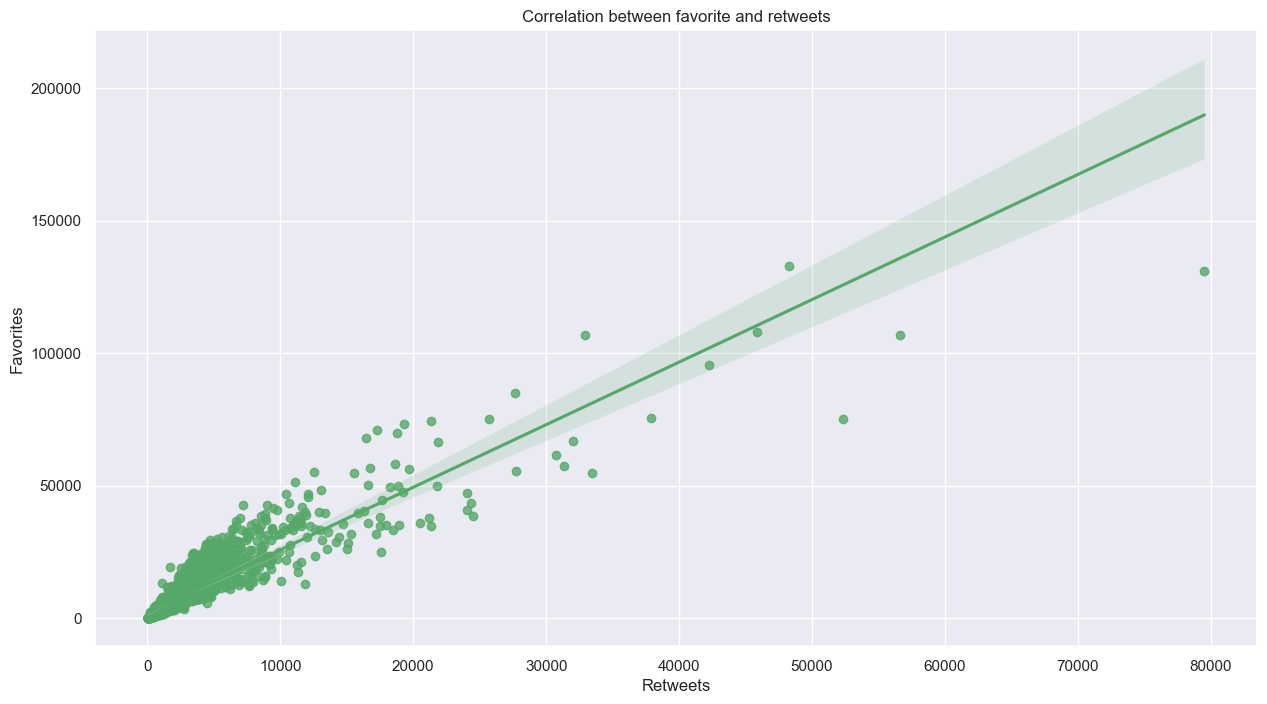

In [179]:
from matplotlib import pyplot as plt

#using seaborn to draw a scatter showing the correlation between retweets and favorites
ax = sns.regplot(x='retweets', y='favorites', data=df_wrangled, color='g')
sns.set(rc = {'figure.figsize':(15,8)})
ax.set(xlabel='Retweets', ylabel='Favorites', title='Correlation between favorite and retweets')
plt.savefig('correlation_fav_retw.png');
plt.show();

Correlation between favorites and retweets is positive which is expected.

In [88]:
#checking which dog stage is popular
df_wrangled['life_stage'].value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: life_stage, dtype: int64

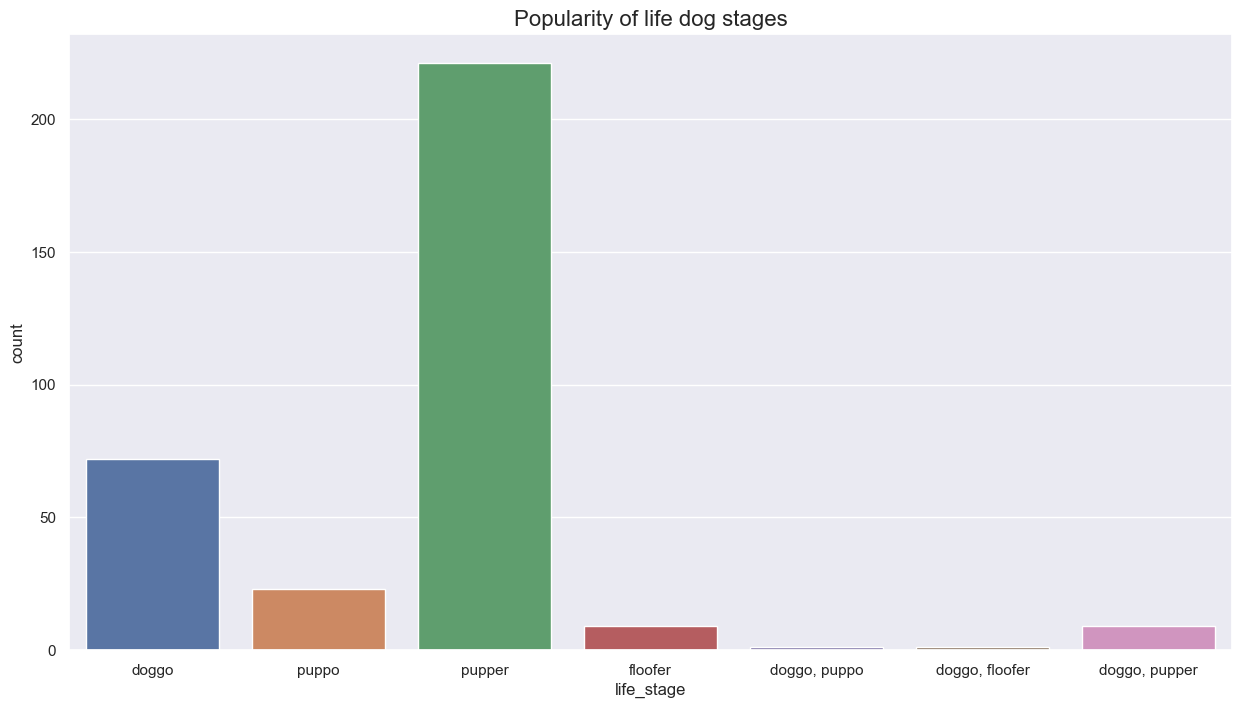

In [181]:
#using the seaborn to display the most popular dog stage
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('Popularity of life dog stages', fontsize=16)
sns.countplot(x=df_wrangled.life_stage, data=df_wrangled.life_stage.value_counts());
plt.savefig('popular_life_stage.png');

The most popular dog stage is Pupper and doggo.

In [104]:
#checking the most source used by users
df_wrangled.source.value_counts()

Twitter for iPhone    1952
Vine                    91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

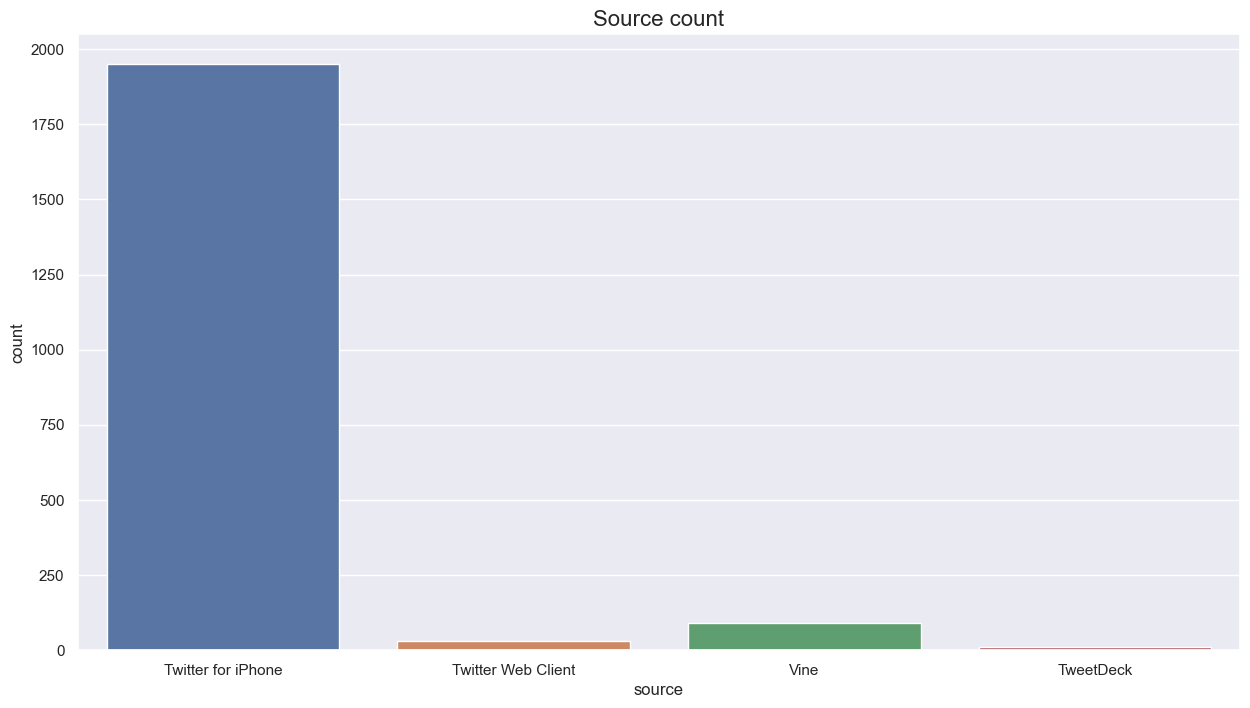

In [180]:
plt.figure(figsize=(15,8));
sns.countplot(x=df_wrangled.source, data=df_wrangled['source']);
plt.title("Source count", fontsize=16);
plt.savefig('source_counts.png');

This shows that most users used Twitter for iphone.

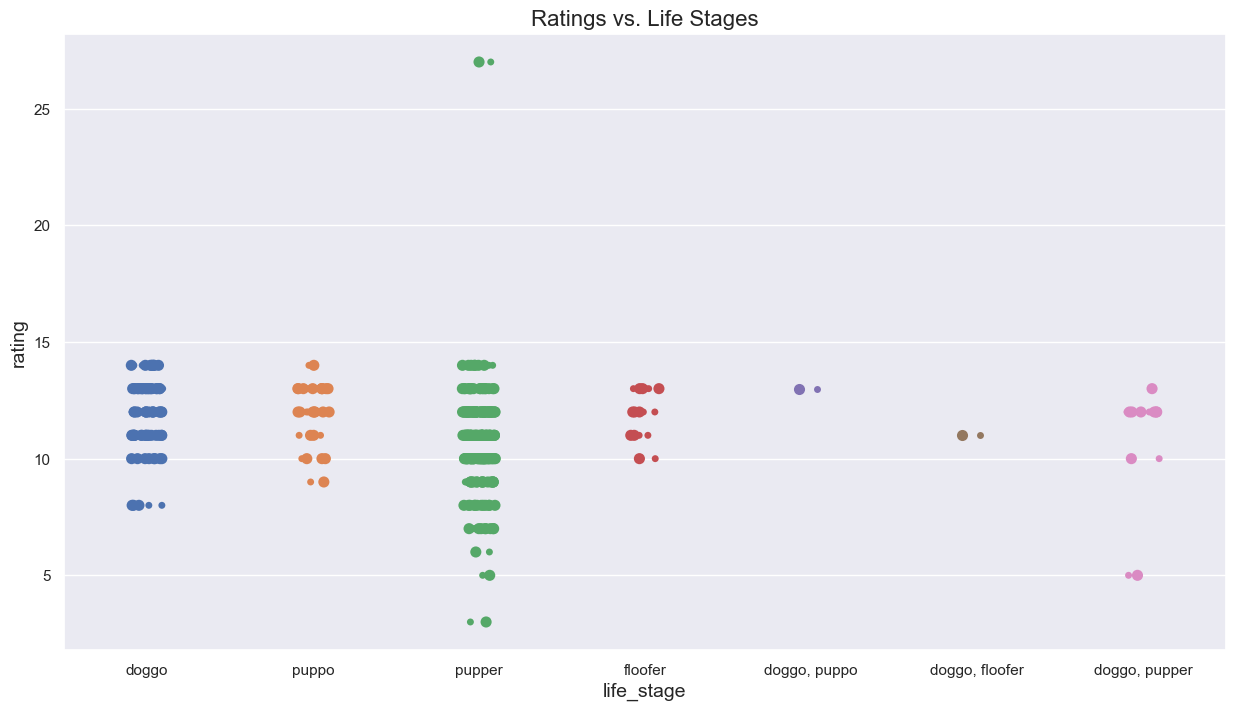

In [147]:
# setting the size
plt.figure(figsize=(15,8))

# using the stripplot do dislay the rating and the stage
X = df_wrangled[df_wrangled.life_stage.notnull()]
sns.stripplot(x="life_stage", y="rating", data=X, size=8)
sns.stripplot(x="life_stage", y="rating", data=X)
plt.title("Ratings vs. Life Stages", fontsize=16)
plt.xlabel('life_stage', fontsize=14)
plt.ylabel('rating', fontsize=14);
plt.savefig('rating_life_stage.png');

This graph shows that the rating is related to the popularity of the life_stage of the dog.

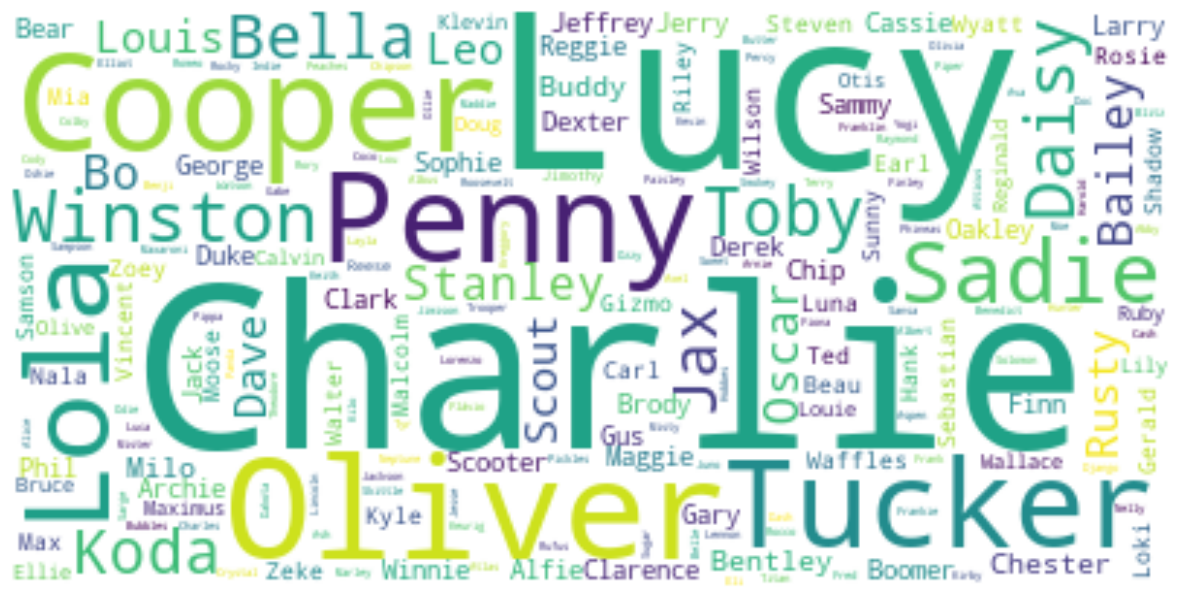

In [151]:
# we need wordcloud library to make a wordclound.
from wordcloud import WordCloud

name = df_wrangled['name'].str.replace('None', '')
#Creating the text variable
text = ' '.join(name)
# Creating word_cloud with text as argument in .generate() method
cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('popular_dogs.png');
plt.show();

This world cloud shows us the most pupular dogs Which are Charlie, Lucy, Olivier, Penny, Tucker and Lola.

#### Ressources: 
.https://google.com,
.https://stackoverflow.com,
.https://pandas.pydata.org,
.https://seaborn.pydata.org/